In [7]:
import pickle
import numpy as np
import scipy.stats as stats
import math
import json

In [8]:
model = "Qwen3-8B"

In [9]:
with open("/data/home/vkropoti/sql_data/mini-dev-index", "rb") as fp:   # Unpickling
    mini_dev_index = np.array(pickle.load(fp))
    
def load_json():
    with open('/home/vkropoti/vllm/dev.json', "r") as j:
        contents = json.loads(j.read())
    return contents

def load_split():
    data = load_json()
    query_level = []
    for k in mini_dev_index:
        query_level.append(data[k]['difficulty'])
    return np.array(query_level)

In [10]:
split = load_split()

In [15]:
np.mean(split=='simple')

np.float64(0.296)

In [17]:
np.mean(split=='moderate')

np.float64(0.5)

In [18]:
np.mean(split=='challenging')

np.float64(0.204)

In [21]:
def I_alpha(mean,n,std_dev,confidence = 0.95):
    # Критическое значение t для 95% ДИ и 49 степеней свободы
    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_value * (std_dev / math.sqrt(n))
    
    # Границы доверительного интервала
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    return ci_lower, ci_upper

In [22]:
def load_results(k,nobs,cot_type,think=False):
    # sql_results_Qwen3-8B-cot_all_new_think==False_nobs2-v0
    # with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_results_{model}-cot_{type_cot}_think=={use_think}-v{k}", "rb") as fp:
    with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_results_Qwen3-8B-cot_{cot_type}_think=={think}_nobs{nobs}-v{k}", "rb") as fp:
        results = np.array(pickle.load(fp))
    return results

In [23]:
def load_executed(k,nobs,cot_type,think=False):
    # /data/home/vkropoti/sql_llm_answers/base_reasoning/sql_executed_{model}-cot_{type_cot}_think=={use_think}-v{version}
    with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_executed_Qwen3-8B-cot_{cot_type}_think=={think}_nobs{nobs}-v{k}", "rb") as fp:
        executed = np.array(pickle.load(fp))
    return executed

In [24]:
def get_think_results(n,nobs=2,cot_type='all_new',think=False):
    
    arr_mean_scores = []
    arr_mean_executed = []
    d_split = {"simple":[], "moderate":[], "challenging":[]}
    for i in range(n):
        result, executed = load_results(i,nobs,cot_type,think), load_executed(i,nobs,cot_type,think)
        arr_mean_scores.append(np.mean(result))
        arr_mean_executed.append(np.mean(executed))
        d_split['simple'].append(np.mean(result[split=='simple']))
        d_split['moderate'].append(np.mean(result[split=='moderate']))
        d_split['challenging'].append(np.mean(result[split=='challenging']))
        
    if cot_type=='all_new':
        add = "данные о размышлениях + финальный ответ"
    elif cot_type=='think':
        add = "только данные о размышлениях"
    elif cot_type=='predict':
        add = "только данные о финальных ответах"

    ci_lower, ci_upper = I_alpha(np.mean(np.array(arr_mean_scores)),n,np.std(np.array(arr_mean_scores)))
    print(f"Модель основывает ответ по {nobs} выводам других моделей, которые включают {add}")
    print(f"Результаты получены прогоном {n} симуляций с разными seed")
    print(f"{model} Mini DEV Финальный результат EX: {np.mean(np.array(arr_mean_scores)):.5f}, при std: {np.std(np.array(arr_mean_scores)):.4f}")
    print(f"95% доверительный интервал: ({ci_lower:.5f},{ci_upper:.5f})")
    for type_ in d_split:
        print(f"{type_}: {np.mean(np.array(d_split[type_])):.5f}")
    # print(f"{model} процент запросов, которые успешно выполнились Mini DEV: {np.mean(np.array(arr_mean_executed)):.4f}, при std: {np.std(np.array(arr_mean_executed)):.4f}")
    

## Использование reasoning+ответ

In [25]:
get_think_results(50,nobs=2,cot_type='all_new')

Модель основывает ответ по 2 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53776, при std: 0.0094
95% доверительный интервал: (0.53508,0.54044)
simple: 0.67054
moderate: 0.51304
challenging: 0.40569


In [26]:
get_think_results(50,nobs=3,cot_type='all_new')

Модель основывает ответ по 3 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53968, при std: 0.0088
95% доверительный интервал: (0.53717,0.54219)
simple: 0.67257
moderate: 0.51696
challenging: 0.40255


In [27]:
get_think_results(50,nobs=4,cot_type='all_new')

Модель основывает ответ по 4 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53924, при std: 0.0077
95% доверительный интервал: (0.53704,0.54144)
simple: 0.66595
moderate: 0.51968
challenging: 0.40333


In [28]:
get_think_results(50,nobs=5,cot_type='all_new')

Модель основывает ответ по 5 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54020, при std: 0.0080
95% доверительный интервал: (0.53793,0.54247)
simple: 0.66676
moderate: 0.51936
challenging: 0.40765


In [29]:
get_think_results(50,nobs=6,cot_type='all_new')

Модель основывает ответ по 6 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54072, при std: 0.0077
95% доверительный интервал: (0.53853,0.54291)
simple: 0.66568
moderate: 0.52112
challenging: 0.40745


In [30]:
get_think_results(50,nobs=7,cot_type='all_new')

Модель основывает ответ по 7 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54080, при std: 0.0074
95% доверительный интервал: (0.53871,0.54289)
simple: 0.66649
moderate: 0.52048
challenging: 0.40824


## Использование только ответ

In [31]:
get_think_results(50,nobs=2,cot_type='predict')

Модель основывает ответ по 2 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53280, при std: 0.0084
95% доверительный интервал: (0.53040,0.53520)
simple: 0.66811
moderate: 0.50936
challenging: 0.39392


In [32]:
get_think_results(50,nobs=3,cot_type='predict')

Модель основывает ответ по 3 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53956, при std: 0.0105
95% доверительный интервал: (0.53656,0.54256)
simple: 0.67068
moderate: 0.51824
challenging: 0.40157


In [33]:
get_think_results(50,nobs=4,cot_type='predict')

Модель основывает ответ по 4 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54072, при std: 0.0085
95% доверительный интервал: (0.53830,0.54314)
simple: 0.66811
moderate: 0.52040
challenging: 0.40569


In [34]:
get_think_results(50,nobs=5,cot_type='predict')

Модель основывает ответ по 5 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54228, при std: 0.0090
95% доверительный интервал: (0.53972,0.54484)
simple: 0.66743
moderate: 0.52328
challenging: 0.40725


In [35]:
get_think_results(50,nobs=6,cot_type='predict')

Модель основывает ответ по 6 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54200, при std: 0.0079
95% доверительный интервал: (0.53975,0.54425)
simple: 0.66622
moderate: 0.52280
challenging: 0.40882


In [36]:
get_think_results(50,nobs=7,cot_type='predict')

Модель основывает ответ по 7 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54168, при std: 0.0071
95% доверительный интервал: (0.53966,0.54370)
simple: 0.66581
moderate: 0.52096
challenging: 0.41235


## Использование только размышлений

In [37]:
get_think_results(50,nobs=2,cot_type='think')

Модель основывает ответ по 2 выводам других моделей, которые включают только данные о размышлениях
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53544, при std: 0.0092
95% доверительный интервал: (0.53282,0.53806)
simple: 0.67189
moderate: 0.51136
challenging: 0.39647


In [38]:
get_think_results(50,nobs=3,cot_type='think')

Модель основывает ответ по 3 выводам других моделей, которые включают только данные о размышлениях
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53816, при std: 0.0081
95% доверительный интервал: (0.53586,0.54046)
simple: 0.67378
moderate: 0.51704
challenging: 0.39314


In [39]:
get_think_results(50,nobs=4,cot_type='think')

Модель основывает ответ по 4 выводам других моделей, которые включают только данные о размышлениях
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53884, при std: 0.0076
95% доверительный интервал: (0.53668,0.54100)
simple: 0.67230
moderate: 0.51896
challenging: 0.39392


In [40]:
get_think_results(50,nobs=5,cot_type='think')

Модель основывает ответ по 5 выводам других моделей, которые включают только данные о размышлениях
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53912, при std: 0.0086
95% доверительный интервал: (0.53668,0.54156)
simple: 0.66689
moderate: 0.52160
challenging: 0.39667


## Использование reasoning+ответ + reasning above

In [41]:
get_think_results(50,nobs=2,cot_type='all_new',think=True)

Модель основывает ответ по 2 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53416, при std: 0.0089
95% доверительный интервал: (0.53162,0.53670)
simple: 0.67270
moderate: 0.51128
challenging: 0.38922


In [42]:
get_think_results(50,nobs=3,cot_type='all_new',think=True)

Модель основывает ответ по 3 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53584, при std: 0.0095
95% доверительный интервал: (0.53314,0.53854)
simple: 0.67027
moderate: 0.51456
challenging: 0.39294


## Использование ответ + reasning above

In [43]:
get_think_results(50,nobs=2,cot_type='predict',think=True)

Модель основывает ответ по 2 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.53848, при std: 0.0092
95% доверительный интервал: (0.53588,0.54108)
simple: 0.67514
moderate: 0.51552
challenging: 0.39647


In [44]:
get_think_results(50,nobs=3,cot_type='predict',think=True)

Модель основывает ответ по 3 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 50 симуляций с разными seed
Qwen3-8B Mini DEV Финальный результат EX: 0.54232, при std: 0.0103
95% доверительный интервал: (0.53940,0.54524)
simple: 0.67527
moderate: 0.52096
challenging: 0.40176


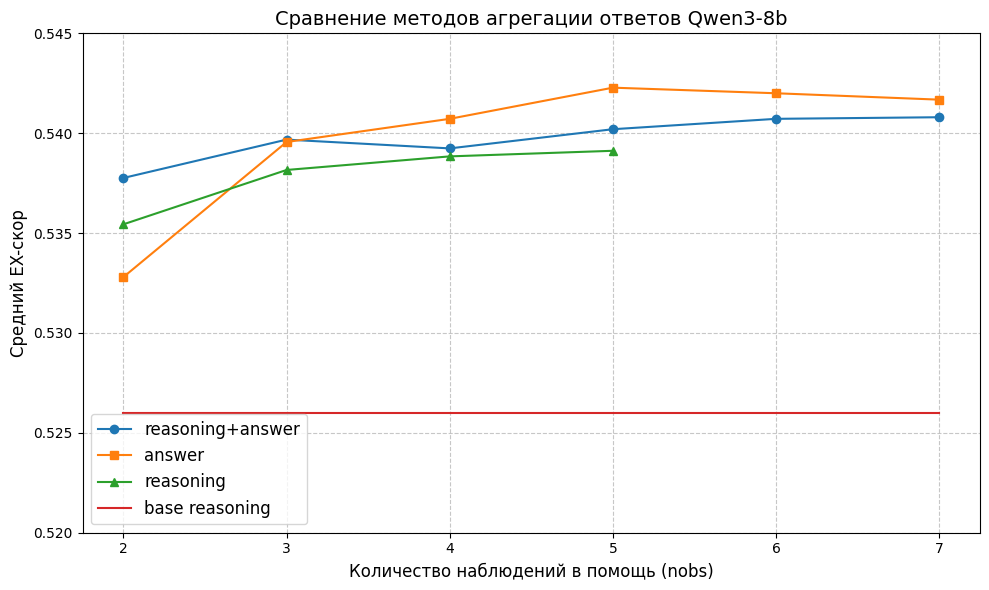

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
nobs = [2, 3, 4, 5, 6, 7]
scores = [0.53776, 0.53968, 0.53924, 0.54020, 0.54072, 0.54080]          # reasoning+answer
scores_predict = [0.53280, 0.53956, 0.54072, 0.54228, 0.54200, 0.54168]  # answer
scores_think = [0.53544, 0.53816, 0.53884, 0.53912]   # reasoning
base_think = [0.526]*6
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(nobs, scores, marker='o', label='reasoning+answer', color='tab:blue')
plt.plot(nobs, scores_predict, marker='s', label='answer', color='tab:orange')
plt.plot(nobs[0:4], scores_think, marker='^', label='reasoning', color='tab:green')
plt.plot(nobs, base_think, label='base reasoning', color='tab:red')

# Настройки
plt.title('Сравнение методов агрегации ответов Qwen3-8b', fontsize=14)
plt.xlabel('Количество наблюдений в помощь (nobs)', fontsize=12)
plt.ylabel('Средний EX-скор', fontsize=12)
plt.xticks(nobs)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ylim(0.52, 0.545)  # Фиксируем диапазон для лучшего сравнения

# Отображение
plt.tight_layout()
plt.show()